# Matplotlib图鉴——漏斗图

## 公众号：可视化图鉴

In [2]:
import matplotlib
print(matplotlib.__version__) #查看Matplotlib版本
import pandas as pd
print(pd.__version__) #查看pandas版本
import numpy as np
print(np.__version__) #查看numpy版本
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['STHeiti']  #设置中文

3.3.3
1.1.5
1.19.5


注意，代码在以下环境全部通过测试:
- Python 3.7.1
- Matplotlib == 3.3.2
- pandas == 1.2.0
- numpy == 1.19.2

因版本不同，可能会有部分语法差异，如有报错，请先检查拼写及版本是否一致！

### 基础漏斗图

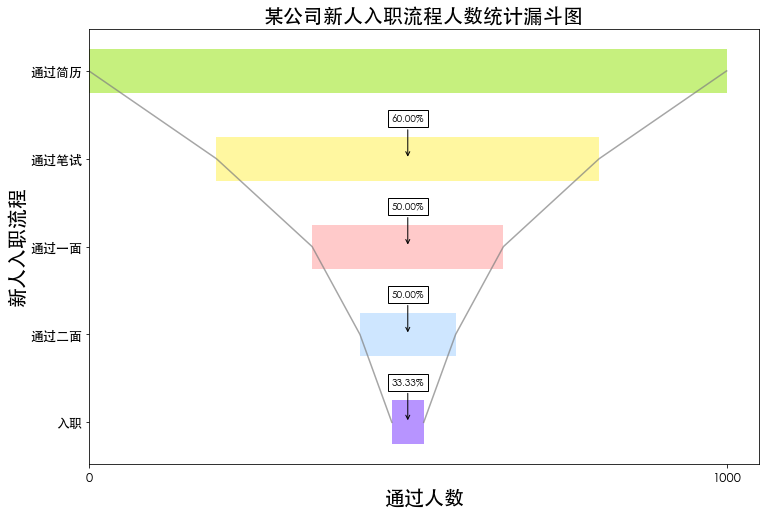

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data

N = 5
width = 0.5
x1 = np.array([1000, 600, 300, 150, 50])
x2= np.array((x1.max()-x1)/2) 
x3=[]
for i,j in zip(x1,x2):
    x3.append(i+j)
x3 = np.array(x3)


y = -np.sort(-np.arange(N)) 
labels=['通过简历','通过笔试','通过一面','通过二面','入职']

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.barh(y,x3,width,tick_label=labels,color=['#BCEE68','#FFF68F','#FFC1C1','#C6E2FF','#AB82FF'],alpha=0.85)
ax.plot(x3,y,'grey',alpha=0.7)
ax.barh(y,x2,width,color='w',alpha = 1)
ax.plot(x2,y,'grey',alpha=0.7)

transform = []       
for i in range(0,len(x1)):
    if i < len(x1)-1:
        transform.append('%.2f%%'%((x1[i+1]/x1[i])*100))
l = [(500,3),(500,2),(500, 1),(500, 0)]
for a,b in zip(transform,l):
    offsetbox = TextArea(a, minimumdescent=False)
    ab = AnnotationBbox(offsetbox, b,
                        xybox=(0, 40),
                        boxcoords="offset points",
                        arrowprops=dict(arrowstyle="->"))
    ax.add_artist(ab)
    

ax.set_xticks([0,1000])
ax.set_yticks(y)

plt.xlabel("通过人数", fontsize = 20)
plt.ylabel("新人入职流程", fontsize = 20)
plt.title('某公司新人入职流程人数统计漏斗图', fontsize = 20)
plt.tick_params(labelsize=13)

plt.show()